<h2> Portfolio Analysis</h2>

Reading the data

In [20]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_excel('../data/Portfolio.xls')

Inspecting the data

In [3]:
idx = df['country'] == 'Switzerland'
df_swiss = df.loc[idx,:]
df_swiss.set_index('date',inplace=True)
df_mini_swiss = df_swiss.loc['2018-01-31',:]


<h3>Rebase exposure </h3>

In [4]:
df['exposure%'] = df['exposure']/df['nav']
df['mtd%'] = df['mtd']/df['nav']

<h3>Top Winners and Losers</h3>

group by issuer

In [5]:
df_issuer = df.groupby('issuer').sum()

create group of winners and losers

In [6]:
idx_winner = df_issuer['mtd%']>0
df_winner = df_issuer.loc[idx_winner,:].copy()
df_winner.sort_values(by='mtd%',ascending=False,inplace=True)

idx_loser = df_issuer['mtd%']<0
df_loser = df_issuer.loc[idx_loser,:].copy()
df_loser.sort_values(by='mtd%',ascending=True,inplace=True)



In [7]:
print('Top Winners')
print(df_winner['mtd%'].head()*100)
print('------------------------------\n')
print('Top Losers')
print(df_loser['mtd%'].head()*100)

Top Winners
issuer
Sky PLC            3.959677
CME Group Inc      3.172502
CVS Health Corp    3.027441
INFORMA PLC        2.622253
Worldpay Inc       2.585200
Name: mtd%, dtype: float64
------------------------------

Top Losers
issuer
Cobalt 27 Capital Corp   -4.614026
Spaxs SpA                -3.156713
NEX Group PLC            -2.969552
NXP Semiconductors NV    -2.877571
Aetna Inc                -2.771514
Name: mtd%, dtype: float64


<h3> PNL by Strategy </h3>

In [8]:
df.groupby('strategy').sum()['mtd%']*100

strategy
ARBITRAGE              1.269347
CAPITAL MARKETS      -21.167305
SPECIAL SITUATIONS    -0.721946
Name: mtd%, dtype: float64

<h3>Evolution of the Fund NAV (AUM)</h3>

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

to make sure we have good looking graphs : add seaborn

In [10]:
import seaborn as sns
sns.set()

In [11]:
df_aum = df.groupby('date').mean()

In [12]:
print('AUM')
df_aum['nav'].head()

AUM


date
2018-01-31    1.884133e+08
2018-02-28    1.901977e+08
2018-03-30    1.924677e+08
2018-04-30    2.003713e+08
2018-05-31    2.027182e+08
Name: nav, dtype: float64

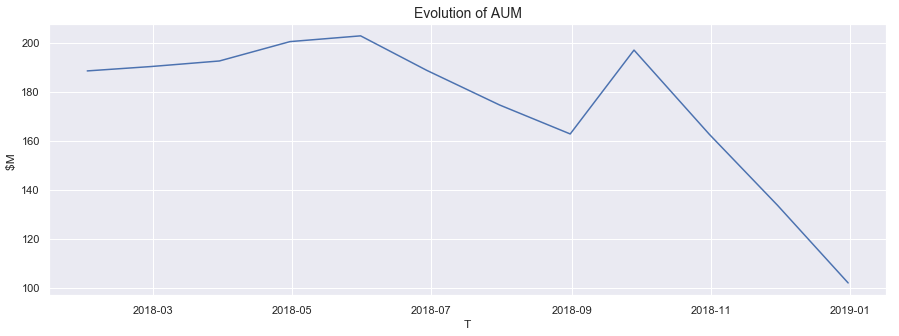

In [21]:
figure , ax = plt.subplots(1,1,figsize = (15,5))
ax.plot(df_aum.index,df_aum['nav']/1e6)
ax.set_title('Evolution of AUM',fontsize=14)
ax.set_ylabel('$M ')
ax.set_xlabel('T');

<h3>Plotting the exposure and PNL across the different strategies </h3>

In [14]:
print('The strategies are :')
for strat in df['strategy'].unique():
    print(strat)

The strategies are :
SPECIAL SITUATIONS
CAPITAL MARKETS
ARBITRAGE


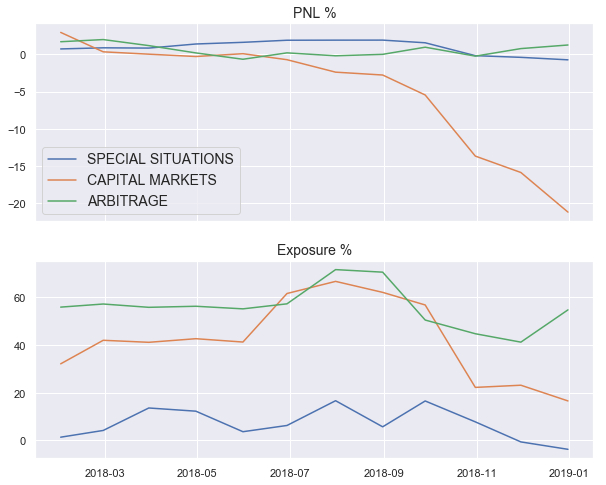

In [15]:
figure , ax = plt.subplots(2,1,figsize = (10,8),sharex=True)

for strat in df['strategy'].unique():
    idx = df['strategy'] == strat
    df_strat = df.loc[idx,:].copy()
    df_strat = df_strat.groupby('date').sum()
    ax[0].plot(df_strat.index,df_strat['mtd%'].cumsum()*100,label=strat)
    ax[1].plot(df_strat.index,df_strat['exposure%']*100,label=strat)

ax[0].legend(fontsize=14);
ax[0].set_title('PNL %',fontsize=14)
ax[1].set_title('Exposure %',fontsize=14);

<h3> Attribution of YTD PNL by Sector / Country </h3>

In [16]:
import numpy as np

In [17]:
df_pivot =df.pivot_table(columns='country',
               index='sector',
               values='mtd%',
               aggfunc=np.sum,
               margins=True,
               margins_name='TOTAL')

In [18]:
df_pivot.fillna(value=0,inplace=True)
df_pivot


country,Australia,Austria,Belgium,Canada,Cayman Islands,Cyprus,Denmark,EMU,Europe,Finland,...,Singapore,South Africa,Spain,Swaziland,Sweden,Switzerland,Turkey,United Kingdom,United States,TOTAL
sector,,,,,,,,,,,,,,,,,,,,,
Basic Materials,0.000000,0.000000,0.001717,-0.046111,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,-0.000631,0.000147,0.000000,3.858460e-03,0.002848,-0.022791
Communications,0.000000,0.000000,0.005109,0.000000,0.000000,0.0,0.000090,0.000000,0.000000,0.000000,...,0.0,-0.006750,-0.000164,0.000000,-0.001055,0.000000,0.000000,6.484414e-02,0.018696,0.082492
"Consumer, Cyclical",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000031,...,0.0,0.000000,0.000000,0.000000,-0.006131,0.000000,0.000090,-9.634700e-03,-0.000159,-0.044681
"Consumer, Non-cyclical",0.000231,0.000000,0.000047,0.000652,0.000000,0.0,-0.008091,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.000264,0.000000,0.000977,-0.010355,-0.000116,-3.642915e-02,0.041400,-0.028629
Diversified,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.001016,-0.031776
Energy,0.000000,0.000000,0.000000,0.000000,-0.000497,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.008061,0.000000,0.000000,-1.452660e-02,0.000000,-0.006799
Financial,0.000000,0.001234,0.000000,0.001160,-0.000237,0.0,0.001694,0.000000,0.000000,0.000215,...,0.0,-0.001362,-0.008255,0.000000,0.000000,-0.000413,0.000000,-6.594543e-02,0.001539,-0.082470
Funds,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-0.002090,-0.002090
Future,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.003964,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.493963e-03,-0.002912,0.004022


Get rid of the NAN - in the pivot table

In [19]:
df.pivot_table(columns='country',
               index='sector',
               values='mtd%',
               aggfunc=np.sum,
               margins=True,
               margins_name='TOTAL').fillna(value=0)*100

country,Australia,Austria,Belgium,Canada,Cayman Islands,Cyprus,Denmark,EMU,Europe,Finland,...,Singapore,South Africa,Spain,Swaziland,Sweden,Switzerland,Turkey,United Kingdom,United States,TOTAL
sector,,,,,,,,,,,,,,,,,,,,,
Basic Materials,0.000000,0.000000,0.171726,-4.611071,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,-0.063080,0.014667,0.000000,3.858460e-01,0.284840,-2.279089
Communications,0.000000,0.000000,0.510863,0.000000,0.000000,0.0,0.008961,0.000000,0.000000,0.000000,...,0.0,-0.675014,-0.016362,0.000000,-0.105491,0.000000,0.000000,6.484414e+00,1.869553,8.249228
"Consumer, Cyclical",0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003062,...,0.0,0.000000,0.000000,0.000000,-0.613101,0.000000,0.008977,-9.634700e-01,-0.015947,-4.468133
"Consumer, Non-cyclical",0.023090,0.000000,0.004723,0.065189,0.000000,0.0,-0.809123,0.000000,0.000000,0.000000,...,0.0,0.000000,-0.026395,0.000000,0.097662,-1.035545,-0.011611,-3.642915e+00,4.140047,-2.862935
Diversified,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.101588,-3.177595
Energy,0.000000,0.000000,0.000000,0.000000,-0.049705,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.806079,0.000000,0.000000,-1.452660e+00,0.000000,-0.679928
Financial,0.000000,0.123372,0.000000,0.116002,-0.023720,0.0,0.169366,0.000000,0.000000,0.021465,...,0.0,-0.136186,-0.825532,0.000000,0.000000,-0.041284,0.000000,-6.594543e+00,0.153894,-8.246978
Funds,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-0.209012,-0.209012
Future,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.396365,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.493963e-01,-0.291182,0.402175
